SMOTE with Imbalance Data using imblearn module

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('../input/creditcard.csv')
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#from sklearn.preprocessing import StandardScaler

#data['normAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


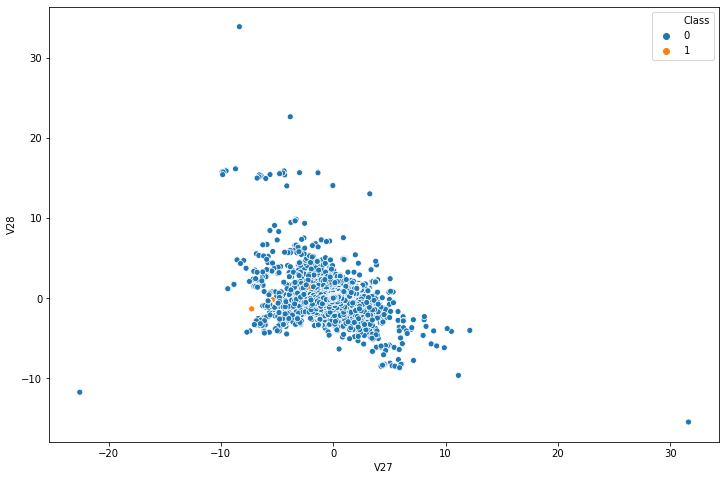

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='V27', y='V28',hue = 'Class')

In [19]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['Class']]
target ='Class'
X=data[columns]
y=data[target]
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (284807, 28)
Shape of y: (284807,)


In [20]:
'''X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))'''

"X = np.array(data.iloc[:, data.columns != 'Class'])\ny = np.array(data.iloc[:, data.columns == 'Class'])\nprint('Shape of X: {}'.format(X.shape))\nprint('Shape of y: {}'.format(y.shape))"

0    284315
1       492
Name: Class, dtype: int64

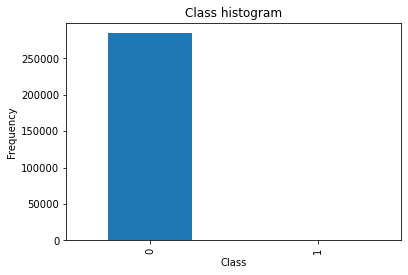

In [28]:
pd.value_counts(y).plot.bar()
plt.title('Class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
y.value_counts()

In [22]:
from imblearn.under_sampling import NearMiss

In [23]:
nm = NearMiss()
X_usmpl,y_usmpl=nm.fit_sample(X,y)
#X_usmpl.shape(),y_usmpl.shape()
np.bincount(y_usmpl)

array([492, 492])

1    492
0    492
Name: Class, dtype: int64

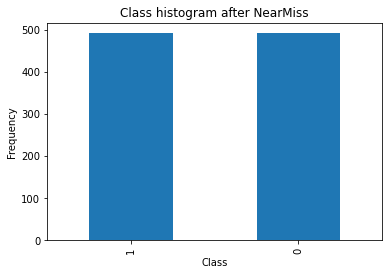

In [24]:
pd.value_counts(y_usmpl).plot.bar()
plt.title('Class histogram after NearMiss')
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(y_usmpl)

In [27]:
X_usmpl

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,1.461443,-0.582645,-2.297665,1.089190,0.054096,-1.349453,0.724947,-0.429395,0.788068,-1.162223,...,-0.177225,0.407291,0.008577,-0.314868,-0.188230,-0.098629,0.084687,-0.328303,-0.036457,0.041937
1,1.719332,1.028017,-2.056034,4.206490,1.101320,-0.713744,0.672316,-0.140571,-1.506492,0.325083,...,-1.579782,-0.049286,-0.212753,-0.766599,0.117322,-0.242448,-0.108112,-0.207626,-0.031489,0.022199
2,1.770391,-0.043727,-2.141603,0.927294,0.326160,-1.265856,0.526820,-0.383667,0.738697,-1.109431,...,-0.170864,0.105418,-0.083091,-0.181550,-0.054756,-0.223937,0.155648,-0.302637,0.000238,0.013488
3,1.710412,-0.177393,-2.423228,0.851039,0.570935,-0.825292,0.500599,-0.273878,0.775121,-1.171742,...,-0.164063,0.195712,-0.080318,-0.316022,-0.057084,0.443548,0.156303,-0.336014,-0.012914,0.028351
4,1.808827,0.054545,-2.194485,0.918804,0.401674,-1.321374,0.554371,-0.423002,0.686408,-1.153439,...,-0.085815,0.115200,-0.103974,-0.199716,-0.066002,-0.251109,0.198276,-0.302800,0.003213,0.014405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968
980,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637
981,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361
982,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700


In [29]:
a=X_usmpl.join(y_usmpl, lsuffix="_left", rsuffix="_right")
a

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.461443,-0.582645,-2.297665,1.089190,0.054096,-1.349453,0.724947,-0.429395,0.788068,-1.162223,...,0.407291,0.008577,-0.314868,-0.188230,-0.098629,0.084687,-0.328303,-0.036457,0.041937,0
1,1.719332,1.028017,-2.056034,4.206490,1.101320,-0.713744,0.672316,-0.140571,-1.506492,0.325083,...,-0.049286,-0.212753,-0.766599,0.117322,-0.242448,-0.108112,-0.207626,-0.031489,0.022199,0
2,1.770391,-0.043727,-2.141603,0.927294,0.326160,-1.265856,0.526820,-0.383667,0.738697,-1.109431,...,0.105418,-0.083091,-0.181550,-0.054756,-0.223937,0.155648,-0.302637,0.000238,0.013488,0
3,1.710412,-0.177393,-2.423228,0.851039,0.570935,-0.825292,0.500599,-0.273878,0.775121,-1.171742,...,0.195712,-0.080318,-0.316022,-0.057084,0.443548,0.156303,-0.336014,-0.012914,0.028351,0
4,1.808827,0.054545,-2.194485,0.918804,0.401674,-1.321374,0.554371,-0.423002,0.686408,-1.153439,...,0.115200,-0.103974,-0.199716,-0.066002,-0.251109,0.198276,-0.302800,0.003213,0.014405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1
980,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1
981,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1
982,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1


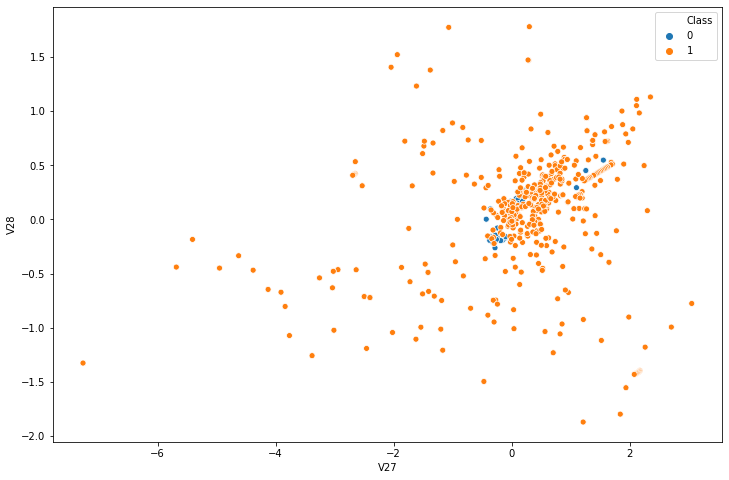

In [49]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = a, x='V27', y='V28',hue = 'Class')

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
smt = SMOTE()
X_osmpl,y_osmpl=smt.fit_sample(X,y)
#X_usmpl.shape(),y_usmpl.shape()
np.bincount(y_osmpl)

array([284315, 284315])

1    284315
0    284315
Name: Class, dtype: int64

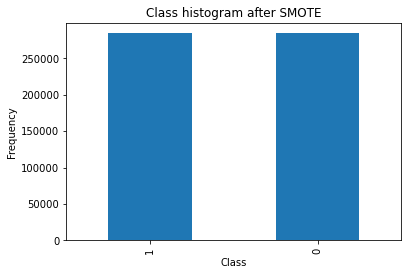

In [33]:
pd.value_counts(y_osmpl).plot.bar()
plt.title('Class histogram after SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(y_osmpl)

In [34]:
b=X_osmpl.join(y_osmpl, lsuffix="_left", rsuffix="_right")
b

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-2.472700,5.647229,-7.268627,6.228588,0.221230,-3.110063,-2.793756,1.507218,-3.823398,-7.250269,...,0.438668,0.708225,-0.429333,-0.463269,-0.284595,1.029960,0.393292,0.417228,0.363124,1
568626,-0.888399,2.307934,-6.062753,2.598831,-3.248018,-0.867259,-0.563828,0.868826,-0.633573,-4.731146,...,-0.031540,0.638756,0.734371,0.590717,0.180220,-0.927122,-0.330357,0.230546,-0.089120,1
568627,-0.759412,5.020689,-8.180637,7.326242,0.207796,-2.086629,-3.100981,1.626229,-4.534874,-5.220156,...,0.811799,0.541034,-0.473938,0.019676,-1.142630,0.027096,0.531122,0.550154,0.125511,1
568628,-4.232215,3.836537,-8.018091,7.759305,-0.841993,-2.043698,-3.546285,0.192812,-1.546850,-2.394336,...,-0.181644,0.548490,0.681607,0.440254,-0.621348,-0.355260,0.368814,-2.667475,0.416170,1


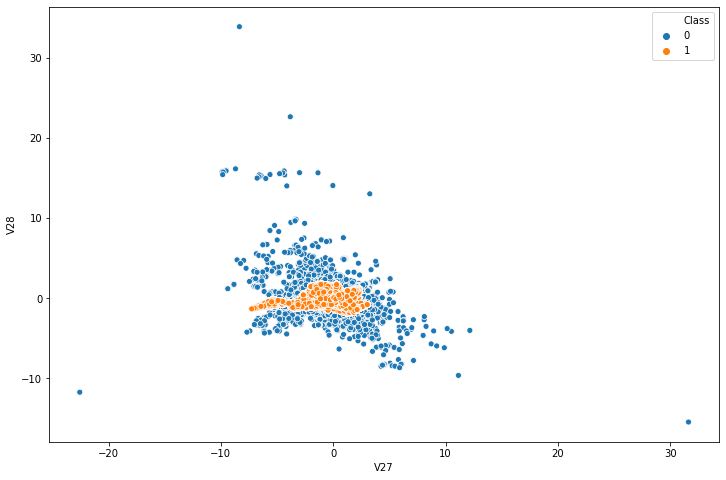

In [50]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = b, x='V27', y='V28',hue = 'Class')

In [52]:
from imblearn.over_sampling import RandomOverSampler

In [53]:
ros = RandomOverSampler()
X_rosmpl,y_rosmpl=ros.fit_sample(X,y)
np.bincount(y_rosmpl)

array([284315, 284315])

1    284315
0    284315
Name: Class, dtype: int64

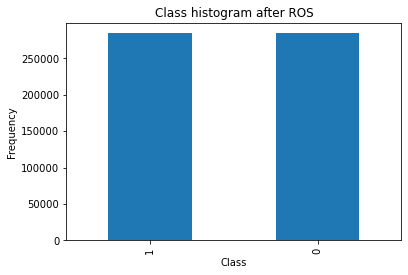

In [54]:
pd.value_counts(y_rosmpl).plot.bar()
plt.title('Class histogram after ROS')
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(y_rosmpl)

In [55]:
c=X_rosmpl.join(y_rosmpl, lsuffix="_left", rsuffix="_right")
c

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-2.434004,3.225947,-6.596282,3.593161,-1.079452,-1.739741,-0.047420,0.301424,-1.779434,-5.836453,...,-0.280533,-0.035491,-0.419178,0.157436,-0.714849,0.468859,-0.348522,0.420036,-0.327643,1
568626,-1.532810,2.232752,-5.923100,3.386708,-0.153443,-1.419748,-3.878576,1.444656,-1.465542,-5.208335,...,0.520840,0.632505,-0.070838,-0.490291,-0.359983,0.050678,1.095671,0.471741,-0.106667,1
568627,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,-0.794944,0.264545,...,0.273799,-0.026055,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,1
568628,-3.600544,4.519047,-6.340884,6.214767,-5.829558,-2.478095,-9.938412,2.830086,-5.659162,-11.298156,...,1.384743,2.263770,0.620749,-0.094069,0.536719,0.398142,0.008277,2.053524,0.835749,1


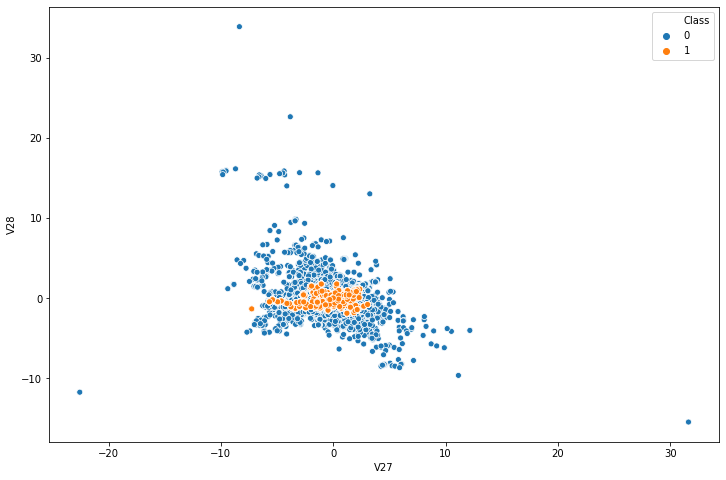

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = c, x='V27', y='V28',hue = 'Class')